In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor

In [3]:
## Import Data 

train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

y = train.SalePrice
train = train.drop(columns=['Id', 'SalePrice'])

print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.30, random_state=0)
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

stdSc = StandardScaler()
X_train = pd.DataFrame(stdSc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(stdSc.transform(X_test), columns=X_test.columns, index=X_test.index)

scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmse_train(model):
    r = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(r)
    
def rmse_test(model):
    r = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(r)

Train shape: (1451, 341)
Test shape: (1459, 341)
X_train : (1015, 341)
X_test : (436, 341)
y_train : (1015,)
y_test : (436,)


## LightGBM 

models.append(('lightbgm', LGBMRegressor(objective='regression', 
                               num_leaves=4,
                               learning_rate=0.01, 
                               n_estimators=5000,
                               max_bin=200, 
                               bagging_fraction=0.75,
                               bagging_freq=5, 
                               bagging_seed=7,
                               feature_fraction=0.2,
                               feature_fraction_seed=7,
                               verbose=-1,
                               #min_data_in_leaf=2,
                               #min_sum_hessian_in_leaf=11
                               )))

In [47]:
model = LGBMRegressor(boosting_type='goss',
                      objective='regression',
                      learning_rate=0.1,
                      n_estimators=1000,
                      colsample_bytree=0.5,
                      feature_fraction=0.9,
                      feature_fraction_bynode=0.9,
                      feature_fraction_seed=np.random.randint(10),
                      num_leaves=10,
                      lambda_l1=0.01,
                      lambda_l2=0.1
                     )

In [48]:
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f'RMSE train: {mean_squared_error(y_train, train_pred, squared=False)}')
print(f'RMSE test: {mean_squared_error(y_test, test_pred, squared=False)}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
RMSE train: 0.012909813408996653
RMSE test: 0.1222234071486434


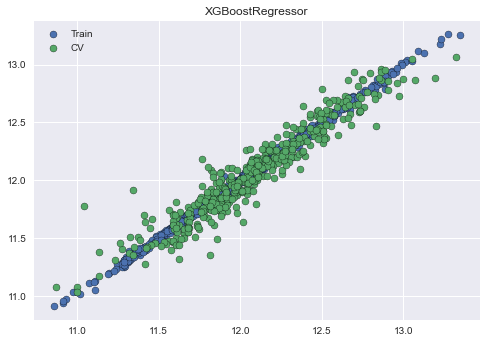

In [24]:
plt.style.use('seaborn')
plt.scatter(y_train, train_pred, label='Train', edgecolors='black')
plt.scatter(y_test, test_pred, label='CV', edgecolors='black')
plt.legend(loc=0)
plt.title('XGBoostRegressor')
plt.show()

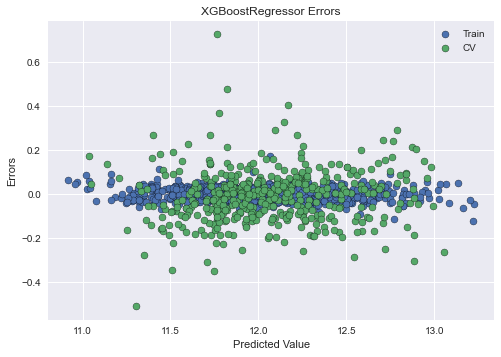

In [7]:
plt.scatter(train_pred, train_pred - y_train , label='Train', edgecolors='black')
plt.scatter(test_pred, test_pred - y_test, label='CV', edgecolors='black')
plt.legend(loc=0)
plt.title('XGBoostRegressor Errors')
plt.xlabel('Predicted Value')
plt.ylabel('Errors')
plt.show()

## lambda_l1, lambda_l2 

In [ ]:
model = LGBMRegressor(boosting_type='goss',
                      objective='regression',
                      learning_rate=0.1,
                      n_estimators=500,
#                       colsample_bytree=0.5,
                      bagging_fraction=0.7,
                      feature_fraction=0.5,
                      feature_fraction_bynode=0.7,
                      feature_fraction_seed=np.random.randint(25)
                     )
model.fit(X_train,y_train)

In [ ]:
lambda_l1=[0.01,0.03,0.1,0.3,1,3,10,30]
param_grids = dict(lambda_l1=lambda_l1)
model = LGBMRegressor(boosting_type='goss',
                      objective='regression',
                      learning_rate=0.1,
                      n_estimators=500,
#                       colsample_bytree=0.5,
                      bagging_fraction=0.7,
                      feature_fraction=0.5,
                      feature_fraction_bynode=0.7,
                      feature_fraction_seed=np.random.randint(25))

gridSearch = GridSearchCV(model, param_grids, cv=5, scoring=scorer)

gridResult = gridSearch.predict(y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))
means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [18]:
lambda_l2=[0.001,0.003,0.01,0.03,0.1,0.3,1,3]
lambda_l1=[0.01,0.03,0.1,0.3,1,3,10,30]
for l in range(0,8):
#     for l in range(0,8):
        model = LGBMRegressor(boosting_type='goss',
                              objective='regression',
                              learning_rate=0.1,
                              n_estimators=500,
        #                       colsample_bytree=0.5,
                              bagging_fraction=0.7,
                              feature_fraction=0.5,
                              feature_fraction_bynode=0.7,
                              feature_fraction_seed=np.random.randint(25),
                              lambda_l2=0.01,
                              num_leaves=10,
                              lambda_l1=lambda_l1[l],
                             )
        print(f'l1 :{lambda_l1[l]}')
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        print(f'RMSE train: {mean_squared_error(y_train, train_pred, squared=False)}')
        print(f'RMSE test: {mean_squared_error(y_test, test_pred, squared=False)}')
        print('----------------------------')

l1 :0.01
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
RMSE train: 0.03538580134489473
RMSE test: 0.12066380017282939
----------------------------
l1 :0.03
[LightGBM] [Warning] lambda_l1 is set=0.03, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: l